
# ------Global University Rankings Dataset 2023------

https://www.kaggle.com/datasets/joyshil0599/global-university-rankings-dataset-2023

#Problem introduction:

**Our Goal:**
To accurately predict the likelihood of 'Number of Studnet' based on key features such as Rank, University name, Location, Number of Students, Number of Students per Staff, International Student Proportion, and Female to Male Ratio.

To know if there is a significant association between features or not.


# DataSet description:
The "Global University Rankings Dataset 2023" is a comprehensive collection of key metrics and characteristics for top universities worldwide. The dataset provides insights into the performance and demographics of renowned academic institutions on a global scale.

Included features: [Rank, University name, Location, Number of Students, Number of Students per Staff, International Student Proportion, Female to Male Ratio]
* Rank: Represents the ranking position of the university in global rankings.

* University Name: Unique identifier for each institution.

* Location: Geographical location of the university, indicating the country or region.

* Number of Students: Total number of students enrolled in the university.

* Number of Students per Staff: Ratio of total students to academic staff members, indicating the student-to-faculty ratio.

* International Student Proportion: Proportion of international students, reflecting the global appeal and diversity of the university.

* Female to Male Ratio: Gender distribution among the university's student body, presenting the ratio of female students to male students.

---

# Preprocessing

In [150]:
import numpy as np, pandas as pd

In [151]:
df=pd.read_csv('world_university_rank.csv')

In [152]:
# Checking the dataset condition
df.head(10)

,Rank,University name,locationLocation,Number of Studnet,Number of student per staffs,International Student,Female : male ratio
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60
5,6,California Institute of Technology,United States,"2,237",6.2,34%,37 : 63
6,7,Princeton University,United States,"8,279",8.0,23%,46 : 54
7,8,"University of California, Berkeley",United States,"40,921",18.4,24%,52 : 48
8,9,Yale University,United States,"13,482",5.9,21%,52 : 48
9,10,Imperial College London,United Kingdom,"18,545",11.2,61%,40 : 60


In [153]:
df.shape

(2345, 7)

In [154]:
df.describe()

,Number of student per staffs
count,2344.000000
mean,18.722056
std,11.921330
min,0.400000
25%,12.300000
50%,16.300000
75%,21.900000
max,232.200000


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rank                          2345 non-null   object 
 1   University name               2345 non-null   object 
 2   locationLocation              2234 non-null   object 
 3   Number of Studnet             2345 non-null   object 
 4   Number of student per staffs  2344 non-null   float64
 5   International Student         2345 non-null   object 
 6   Female : male ratio           2255 non-null   object 
dtypes: float64(1), object(6)
memory usage: 128.4+ KB


So we need to make some changes on the dataset:

* **changing the columns names** to be easier in using.

* Converting the 'International Student' column **to a numerical value.**

* Separating the Female : male ratio column into two columns: emale_ratio and male_ratio

## Data Cleanning

### Missing Values Treatment

In [156]:
# Checking missing values
df.isna().sum()

Rank                              0
University name                   0
locationLocation                111
Number of Studnet                 0
Number of student per staffs      1
International Student             0
Female : male ratio              90
dtype: int64

As the missing values not too much, I will drop them

In [157]:
df.dropna(subset=['locationLocation', 'Number of student per staffs', 'Female : male ratio'], inplace=True)

In [158]:
# Checking duplicates
df.duplicated().sum()

0

Now: let's clean all column names, editing on types of columns and adding an underscore if there is a space between words.

### Cleanning columns

In [159]:
# Clean and correct column names
clean_names = []

for col_name in df.columns:
    # Common cleaning steps
    cleaned_col = col_name #.replace(':', ' ').lower().replace(' ', '_')

    # Manual corrections for specific columns
    if cleaned_col == 'locationlocation':
        cleaned_col = 'location'
    elif cleaned_col == 'Number of Studnet':
        cleaned_col = 'n_student'
    elif cleaned_col == 'Number of student per staffs':
        cleaned_col = 'n_student_per_staff'
    elif cleaned_col == 'International Student':
        cleaned_col = 'international_student_prop'

    clean_names.append(cleaned_col)

# Applying the changes
df.columns = clean_names
df.head(2)

,Rank,University name,locationLocation,n_student,n_student_per_staff,international_student_prop,Female : male ratio
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50


In [160]:
#convert international_student_prop to float. Removing percent symbol at first
df['international_student_prop'] = df['international_student_prop'].str.rstrip('%')
df['international_student_prop'] = pd.to_numeric(df['international_student_prop'], errors='coerce')

df.head(2)

,Rank,University name,locationLocation,n_student,n_student_per_staff,international_student_prop,Female : male ratio
0,1,University of Oxford,United Kingdom,"20,965",10.6,42.0,48 : 52
1,2,Harvard University,United States,"21,887",9.6,25.0,50 : 50


In [161]:
# Splitting 'female_male_ratio' and creating new columns
df[['female_prop', 'male_prop']] = df['Female : male ratio'].str.split(':', expand=True).astype(float)

# Dropping the original 'female_male_ratio' column
df.drop(columns='Female : male ratio', inplace=True)

In [162]:
# Changing `n_student` from object to integer
df['n_student'] = df['n_student'].str.replace(',', '').astype('int')

In [163]:
df.head(2)

,Rank,University name,locationLocation,n_student,n_student_per_staff,international_student_prop,female_prop,male_prop
0,1,University of Oxford,United Kingdom,20965,10.6,42.0,48.0,52.0
1,2,Harvard University,United States,21887,9.6,25.0,50.0,50.0


## Data Analysis (Min, Max, Mean, Variance, Standard Deviation,    Skewness, Kurtosis).

In [164]:
column_name = 'n_student'
print(f"Statistics for the '{column_name}' column:")
print(f" - Minimum: {df[column_name].min():.2f}")
print(f" - Maximum: {df[column_name].max():.2f}")
print(f" - Mean: {df[column_name].mean():.2f}")
print(f" - Variance: {df[column_name].var():.2f}")
print(f" - Standard Deviation: {df[column_name].std():.2f}")
print(f" - Skewness: {df[column_name].skew():.2f}")
print(f" - Kurtosis: {df[column_name].kurtosis():.2f}")

Statistics for the 'n_student' column:
 - Minimum: 115.00
 - Maximum: 460632.00
 - Mean: 19416.57
 - Variance: 644636012.91
 - Standard Deviation: 25389.68
 - Skewness: 8.56
 - Kurtosis: 121.81


In [165]:
column_name = 'female_prop'
print(f"Statistics for the '{column_name}' column:")
print(f" - Minimum: {df[column_name].min():.2f}")
print(f" - Maximum: {df[column_name].max():.2f}")
print(f" - Mean: {df[column_name].mean():.2f}")
print(f" - Variance: {df[column_name].var():.2f}")
print(f" - Standard Deviation: {df[column_name].std():.2f}")
print(f" - Skewness: {df[column_name].skew():.2f}")
print(f" - Kurtosis: {df[column_name].kurtosis():.2f}")

Statistics for the 'female_prop' column:
 - Minimum: 2.00
 - Maximum: 100.00
 - Mean: 50.85
 - Variance: 185.28
 - Standard Deviation: 13.61
 - Skewness: -0.29
 - Kurtosis: 1.28


In [166]:
column_name = 'male_prop'
print(f"Statistics for the '{column_name}' column:")
print(f" - Minimum: {df[column_name].min():.2f}")
print(f" - Maximum: {df[column_name].max():.2f}")
print(f" - Mean: {df[column_name].mean():.2f}")
print(f" - Variance: {df[column_name].var():.2f}")
print(f" - Standard Deviation: {df[column_name].std():.2f}")
print(f" - Skewness: {df[column_name].skew():.2f}")
print(f" - Kurtosis: {df[column_name].kurtosis():.2f}")

Statistics for the 'male_prop' column:
 - Minimum: 0.00
 - Maximum: 98.00
 - Mean: 49.15
 - Variance: 185.28
 - Standard Deviation: 13.61
 - Skewness: 0.29
 - Kurtosis: 1.28


In [167]:
df.describe()

,n_student,n_student_per_staff,international_student_prop,female_prop,male_prop
count,2152.000000,2152.000000,2150.000000,2152.000000,2152.000000
mean,19416.574349,19.008039,10.121860,50.847584,49.152416
std,25389.683198,11.898971,13.456236,13.611806,13.611806
min,115.000000,0.400000,0.000000,2.000000,0.000000
25%,6759.750000,12.600000,1.000000,44.000000,41.000000
50%,13990.500000,16.700000,5.000000,53.000000,47.000000
75%,25285.000000,22.325000,14.000000,59.000000,56.000000
max,460632.000000,232.200000,100.000000,100.000000,98.000000


Here are some interesting insights from the data:

1. Number of Students:
  - Average number of students per university: 19,416.
  - Median number of students: 13,990.
=> **Indicates a few universities with very high student numbers, impacting the average positively.**

2. Student-per-Staff:
  - Average student-to-faculty ratio: 16 students per academic staff member.
=> **Lower ratio suggests potentially better student-to-faculty interaction and improved educational experiences.**

3. International Student Proportion:
  - Mean proportion of international students: 10%.
  - Median proportion: 5%.
=> **On average, 5% of students at each university are international, but some universities have a higher proportion.**

4. Gender Imbalance:
  - Slight gender imbalance with a slightly higher proportion of female students, on average.
=> **Indicates that, on average, there are slightly more female students than male students at universities, but the difference is not significant.**

In [168]:
# Categorical Summary Statistics
df.describe(include = 'object')

,Rank,University name,locationLocation
count,2152,2152,2152
unique,144,2152,116
top,Reporter,University of Oxford,United States
freq,508,1,174


* Location of Universities (2023):
  - The majority of universities in the dataset are located in the **United States**, totaling around 174 universities. The United States stands out as a prominent study destination, offering a more extensive range of choices compared to other countries.

## Data Visualization

**Let's see the distribution of all numeric variables using a box plot.**

In [169]:
import matplotlib.pyplot as plt, seaborn as sns, plotly.express as px

In [170]:
# Identifying numerical and categorical columns
numeric_columns = df.select_dtypes(exclude='object').columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()

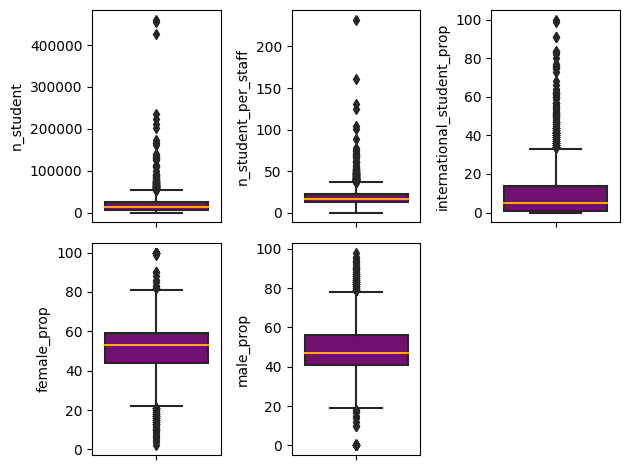

In [171]:
#Making boxplot

for i in range(0, len(numeric_columns)):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data = df, y = numeric_columns[i], color = 'purple', medianprops = dict(color = 'orange'))

plt.tight_layout()

* Overworked Staff: A few universities have a **high student-per-staff ratio**, with one university having more than 200 students per staff member.

    => This suggests that these universities may have overworked staff and that the quality of education may be compromised.

* Gender Imbalance: A subset of universities has a remarkably **high proportion of either male or female students**, with some institutions having over 80% representation of one gender.

    => This may indicate that these universities are not as inclusive as others.

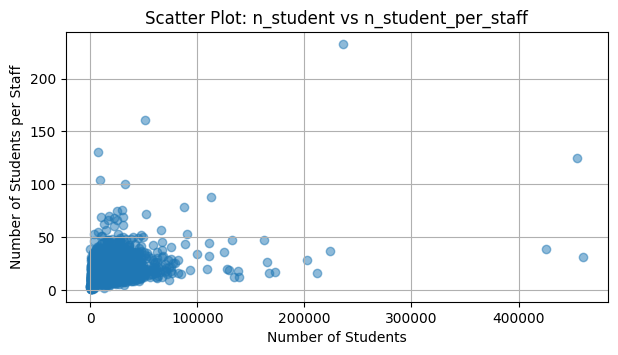

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

# Scatter plot for n_student and n_student_per_staff with university name
plt.figure(figsize=(7, 3.5))
plt.scatter(df['n_student'], df['n_student_per_staff'], alpha=0.5)
plt.title('Scatter Plot: n_student vs n_student_per_staff')
plt.xlabel('Number of Students')
plt.ylabel('Number of Students per Staff')
plt.grid(True)
plt.show()

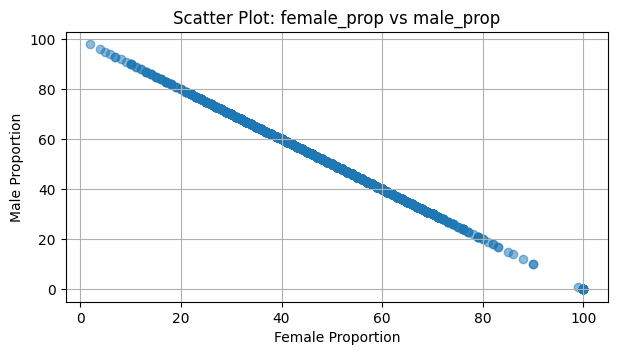

In [173]:
# Scatter plot for female_prop and male_prop with university name
plt.figure(figsize=(7, 3.5))
plt.scatter(df['female_prop'], df['male_prop'], alpha=0.5)
plt.title('Scatter Plot: female_prop vs male_prop')
plt.xlabel('Female Proportion')
plt.ylabel('Male Proportion')
plt.grid(True)
plt.show()

<ipython-input-174-b481d0656285>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


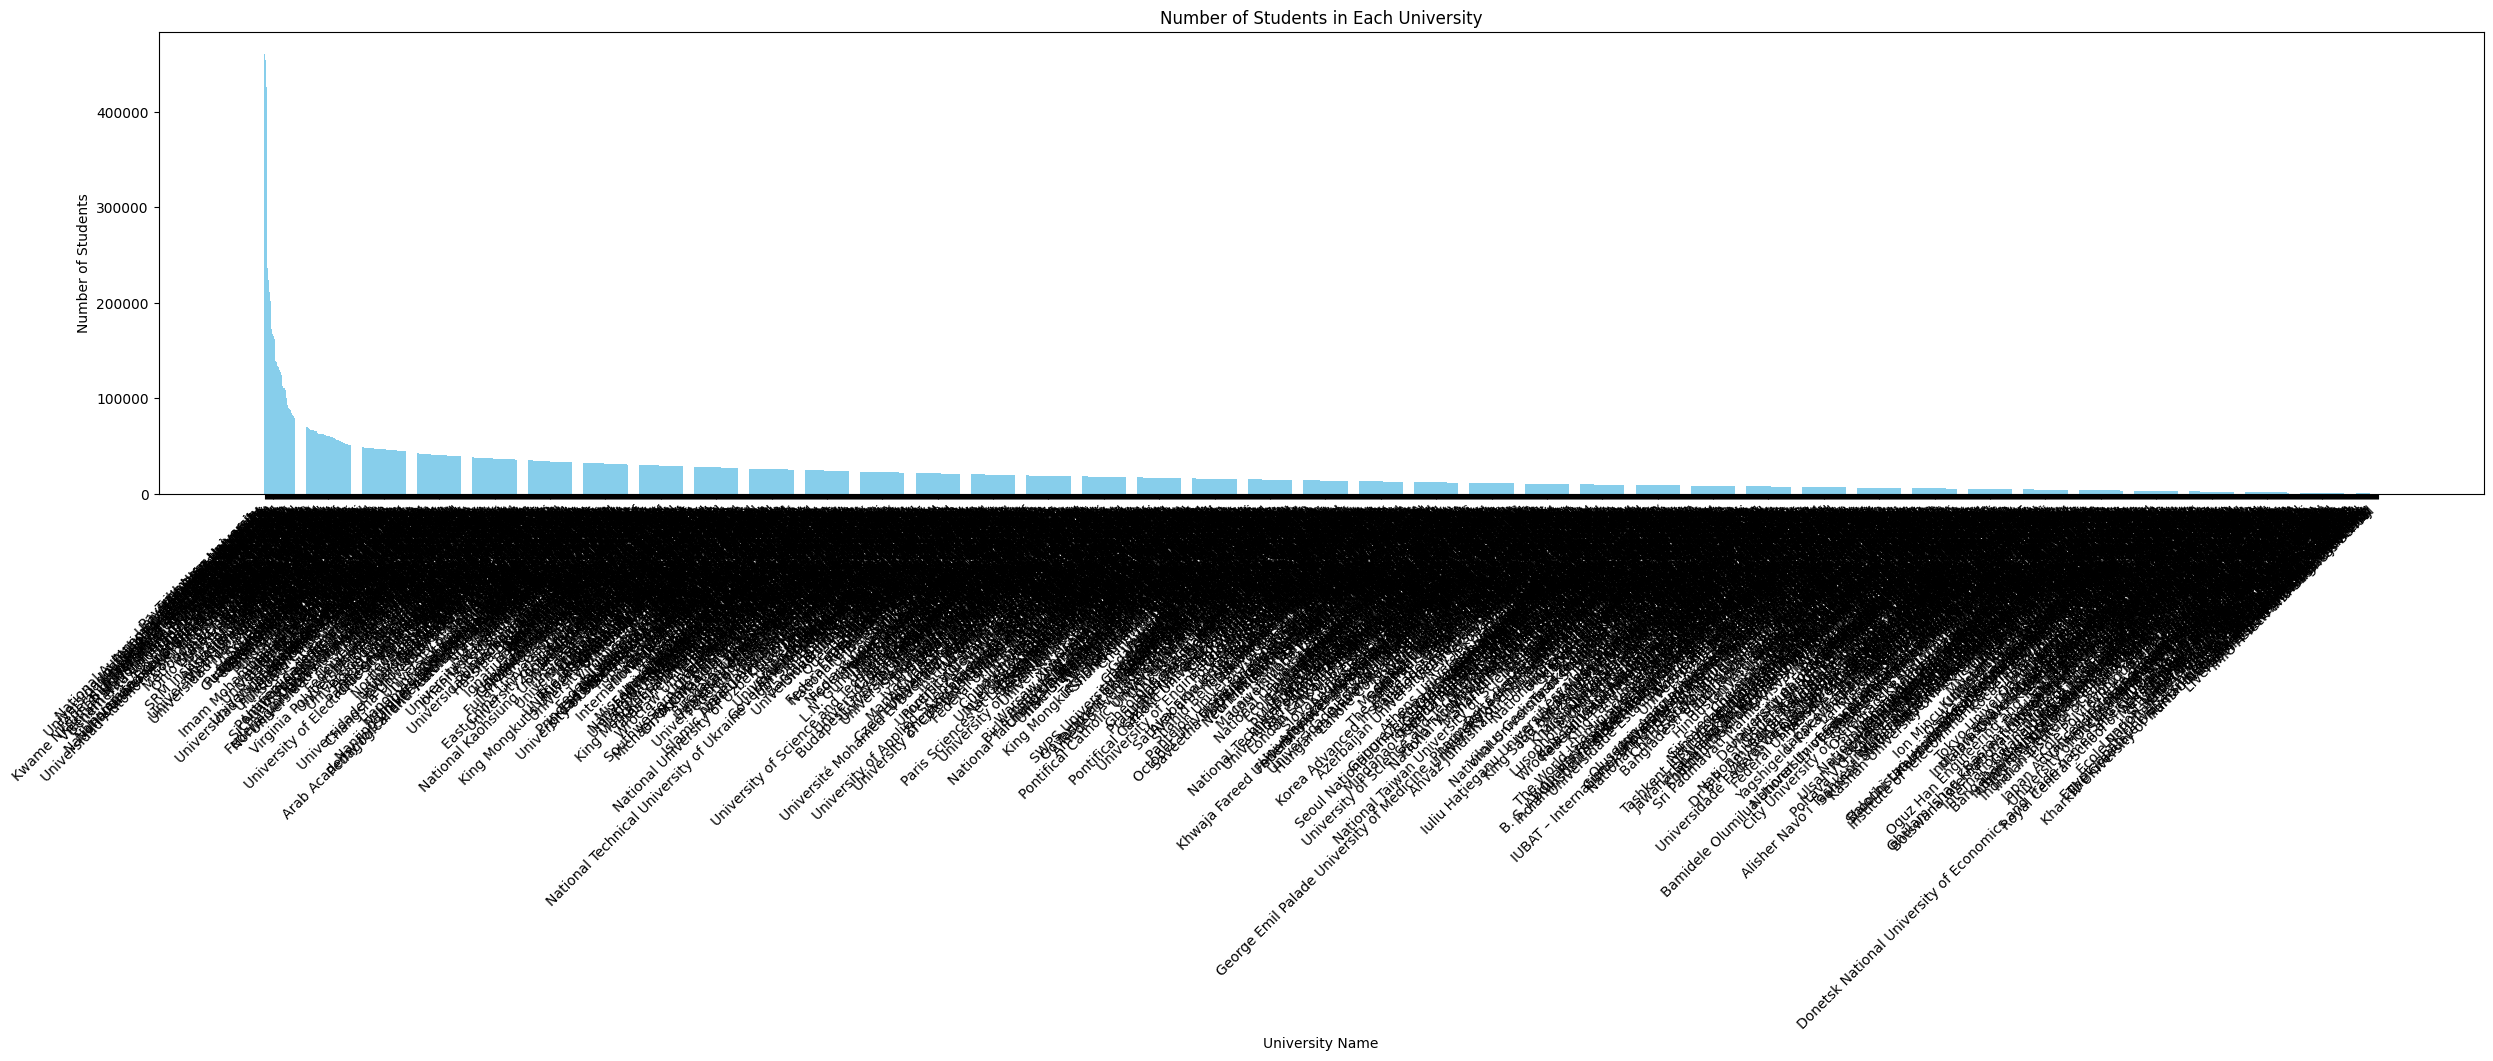

In [174]:
# Sort the dataframe by 'n_student' for better visualization
df = df.sort_values(by='n_student', ascending=False)

# Create a bar chart
plt.figure(figsize=(30, 6))
plt.bar(df['University name'], df['n_student'], color='skyblue')
plt.xlabel('University Name')
plt.ylabel('Number of Students')
plt.title('Number of Students in Each University')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

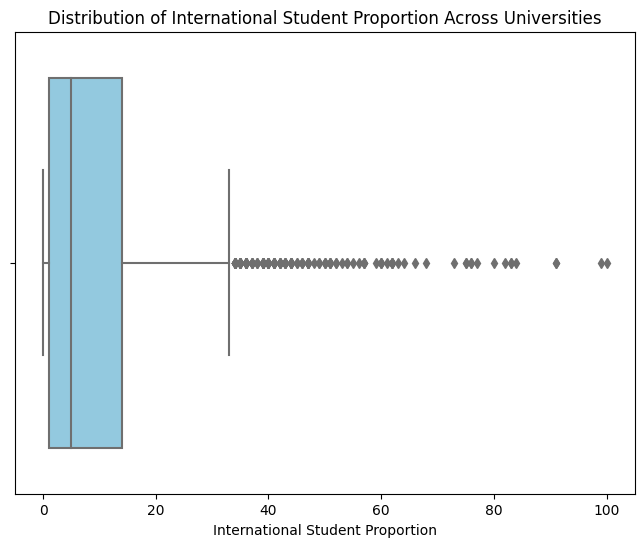

In [175]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='international_student_prop', data=df, color='skyblue')
plt.xlabel('International Student Proportion')
plt.title('Distribution of International Student Proportion Across Universities')
plt.show()

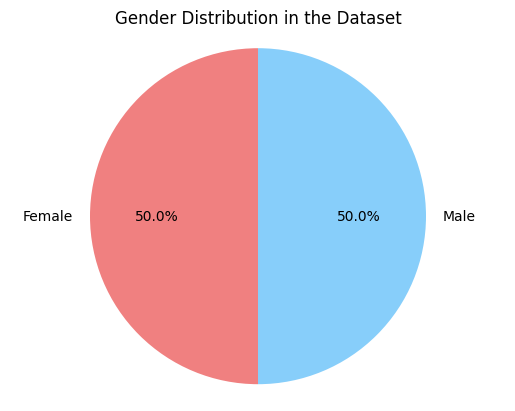

In [176]:
# Create a pie chart
labels = ['Female', 'Male']
sizes = [df['female_prop'].iloc[0], df['male_prop'].iloc[0]]
colors = ['lightcoral', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution in the Dataset')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**Then, let's further check the distribution shape using a histogram and their skewness values.**

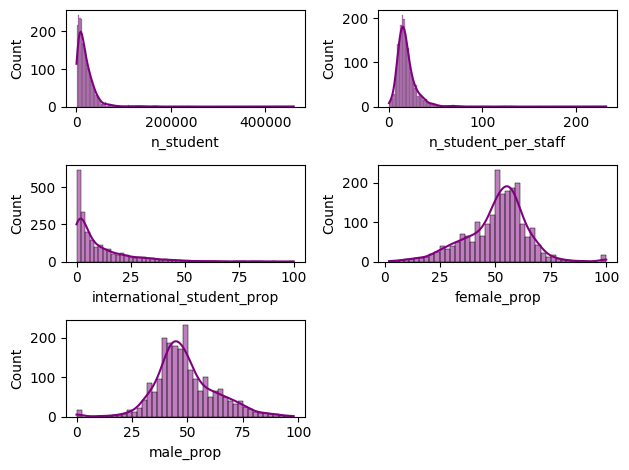

In [177]:
# Histogram + KDE
for i in range(0, len(numeric_columns)):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data = df, x = numeric_columns[i], kde = True, color = 'purple')

plt.tight_layout()

In [178]:
#Skewness in numbers
print('Skewness values:')
df.skew(numeric_only = True)

Skewness values:


n_student                     8.561805
n_student_per_staff           5.403904
international_student_prop    2.350499
female_prop                  -0.287476
male_prop                     0.287476
dtype: float64

* n_student (Number of Students)=> Skewness: 8.561805.
* n_student_per_staff (Number of Students per Staff)=> Skewness: 5.403904.

This suggests that the distribution of the number of students and students per staff is skewed to the right. This means that there might be a few universities with an exceptionally large number of students ans also few universities have higher student-to-staff ratio.

* international_student_prop (Proportion of International Students)=> Skewness: 2.350499.

This implies that there might be a few universities with a notably higher proportion of international students.

* female_prop (Proportion of Female Students) => Skewness: -0.287476 .

A small negative skewness suggests that **most universities** might have a slightly **higher proportion of female students.**

* male_prop (Proportion of Male Students)=> Skewness: 0.287476.

This suggests a slight rightward skew in the distribution of the proportion of male students. Most universities might have a slightly higher proportion of male students.

## Data Analysis (Covariance matrix, Correlation, Heat map, Chi-square Test, Z-test or t-test, ANOVA)

#### Covariance matrix

<ipython-input-179-78c3b510901a>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Cov_Matrix = df.cov()


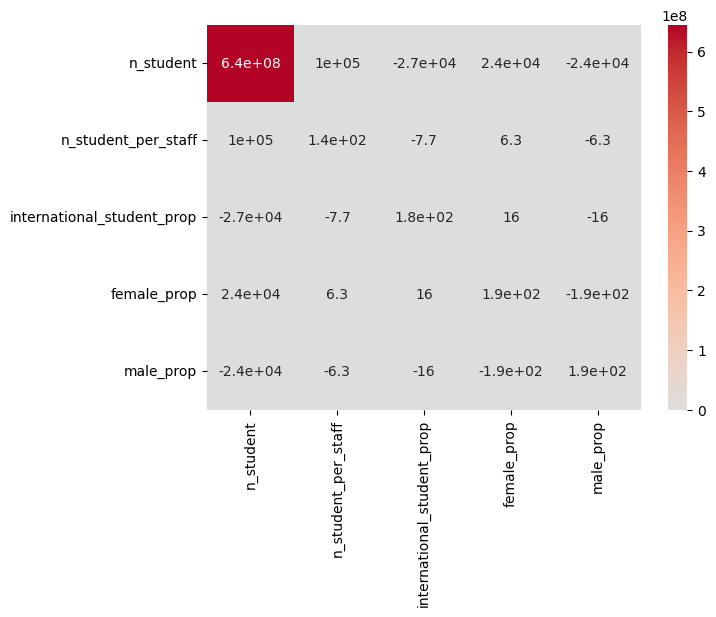

In [179]:
#Covariance matrix , heatmap
Cov_Matrix = df.cov()

# Set up the figure and plot the heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(Cov_Matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

#### Correlation matrix & Heatmap

<ipython-input-180-ae3759c87697>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Matrix = df.corr()


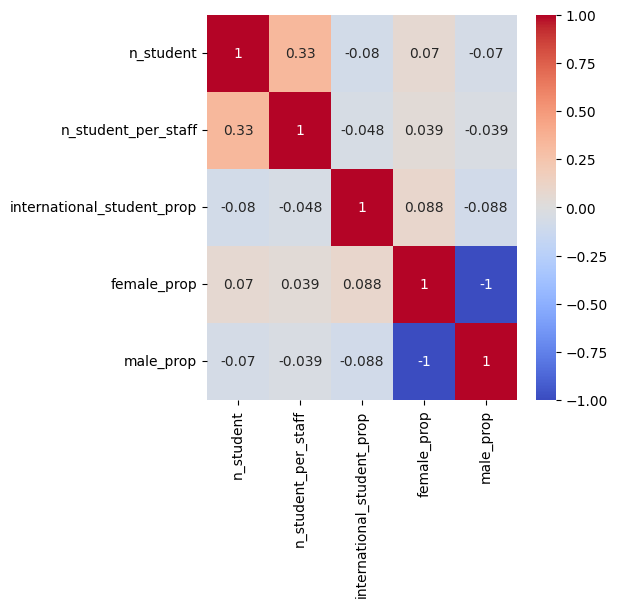

In [180]:
#Correlation matrix , heatmap
Corr_Matrix = df.corr()

# Set up the figure and plot the heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(Corr_Matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

#### Z-test

In [181]:
df.head(1)

,Rank,University name,locationLocation,n_student,n_student_per_staff,international_student_prop,female_prop,male_prop
986,801–1000,Tribhuvan University,Nepal,460632,30.9,0.0,50.0,50.0


In [182]:
from scipy.stats import zscore, norm

# Assuming 'n_student' is the column we to perform the Z-test on
z_scores = zscore(df['n_student'])

# Define the significance level (alpha)
alpha = 0.05

# Assuming a two-tailed test (absolute Z-scores are considered)
critical_value = norm.ppf(1 - alpha / 2)

# Displaying results
print("Z-scores:")
print(z_scores)

#Case to reject or accept the null hypothesis
for z_score in z_scores:
    if abs(z_score) > critical_value:
        print(f"Reject the null hypothesis for Z-score: {z_score}")
    else:
        print(f"Accept the null hypothesis for Z-score: {z_score}")

Z-scores:
986     17.381783
1713    17.126621
806     16.016542
1164     8.543463
830      8.068121
          ...    
2079    -0.756647
2011    -0.757238
1890    -0.758932
2051    -0.759720
2099    -0.760390
Name: n_student, Length: 2152, dtype: float64
Reject the null hypothesis for Z-score: 17.38178341261678
Reject the null hypothesis for Z-score: 17.126620504389987
Reject the null hypothesis for Z-score: 16.01654169815028
Reject the null hypothesis for Z-score: 8.543463440302263
Reject the null hypothesis for Z-score: 8.06812058857083
Reject the null hypothesis for Z-score: 7.564176799465203
Reject the null hypothesis for Z-score: 7.201031564320139
Reject the null hypothesis for Z-score: 6.039778353605118
Reject the null hypothesis for Z-score: 5.816564977348669
Reject the null hypothesis for Z-score: 5.757196364920419
Reject the null hypothesis for Z-score: 5.616200834807143
Reject the null hypothesis for Z-score: 4.699198053458513
Reject the null hypothesis for Z-score: 4.68627641

In [183]:
# Assuming 'female_prop' is the column we to perform the Z-test on
z_scores = zscore(df['female_prop'])

# Define the significance level (alpha)
alpha = 0.05

# Assuming a two-tailed test (absolute Z-scores are considered)
critical_value = norm.ppf(1 - alpha / 2)

# Displaying results
print("Z-scores:")
print(z_scores)

# Case to reject or accept the null hypothesis
for z_score in z_scores:
    if abs(z_score) > critical_value:
        print(f"Reject the null hypothesis for Z-score: {z_score}")
    else:
        print(f"Accept the null hypothesis for Z-score: {z_score}")

Z-scores:
986    -0.062283
1713    0.672544
806    -0.944075
1164    1.627820
830     0.231648
          ...   
2079    1.039958
2011    0.819510
1890    0.525579
2051   -0.650144
2099   -1.458454
Name: female_prop, Length: 2152, dtype: float64
Accept the null hypothesis for Z-score: -0.06228274401690021
Accept the null hypothesis for Z-score: 0.6725443674105639
Accept the null hypothesis for Z-score: -0.9440752777298572
Accept the null hypothesis for Z-score: 1.6278196122662674
Accept the null hypothesis for Z-score: 0.23164810055408544
Accept the null hypothesis for Z-score: -0.20924816630239304
Accept the null hypothesis for Z-score: 0.08468267826859262
Accept the null hypothesis for Z-score: 0.08468267826859262
Accept the null hypothesis for Z-score: 0.9664752119815496
Accept the null hypothesis for Z-score: 0.08468267826859262
Accept the null hypothesis for Z-score: 0.08468267826859262
Accept the null hypothesis for Z-score: 0.15816538941133904
Accept the null hypothesis for Z-sco

In [184]:
# Assuming 'male_prop' is the column we to perform the Z-test on
z_scores = zscore(df['male_prop'])

# Define the significance level (alpha)
alpha = 0.05

# Assuming a two-tailed test (absolute Z-scores are considered)
critical_value = norm.ppf(1 - alpha / 2)

# Displaying results
print("Z-scores:")
print(z_scores)

# Case to reject or accept the null hypothesis
for z_score in z_scores:
    if abs(z_score) > critical_value:
        print(f"Reject the null hypothesis for Z-score: {z_score}")
    else:
        print(f"Accept the null hypothesis for Z-score: {z_score}")

Z-scores:
986     0.062283
1713   -0.672544
806     0.944075
1164   -1.627820
830    -0.231648
          ...   
2079   -1.039958
2011   -0.819510
1890   -0.525579
2051    0.650144
2099    1.458454
Name: male_prop, Length: 2152, dtype: float64
Accept the null hypothesis for Z-score: 0.06228274401690021
Accept the null hypothesis for Z-score: -0.6725443674105639
Accept the null hypothesis for Z-score: 0.9440752777298572
Accept the null hypothesis for Z-score: -1.6278196122662674
Accept the null hypothesis for Z-score: -0.23164810055408544
Accept the null hypothesis for Z-score: 0.20924816630239304
Accept the null hypothesis for Z-score: -0.08468267826859262
Accept the null hypothesis for Z-score: -0.08468267826859262
Accept the null hypothesis for Z-score: -0.9664752119815496
Accept the null hypothesis for Z-score: -0.08468267826859262
Accept the null hypothesis for Z-score: -0.08468267826859262
Accept the null hypothesis for Z-score: -0.15816538941133904
Accept the null hypothesis for Z

##### Conclusion of Z-test:
As: For Z-scores with **absolute values less than the critical value** we **accept** the null hypothesis. & For Z-scores with absolute values **greater than** the critical value, we **reject the null hypothesis**.

   => In previous outputs, most of the Z-scores have absolute values **less than the critical value** of 1.96 for a two-tailed test with a significance level of 0.05. Therefore, the null hypothesis **is generally accepted for these data points.**

   => However, there are a few cases where the Z-scores **exceed the critical value** (e.g., Z-scores with absolute values greater than 2), leading to the **rejection of the null hypothesis** for those specific data points.

#### T-test

In [185]:
#t-test
#from scipy.stats import ttest_1samp

# Assuming 'n_student' is the column to perform the T-test on
#t_statistic, p_value = ttest_1samp(df['n_student'], popmean=5000)

# Displaying results
#print("T-Statistic:", t_statistic)
#print("P-value:", p_value)

# Interpretation
#alpha = 0.05
#if p_value < alpha:
#    print("Reject the null hypothesis. The sample mean is significantly different from the expected mean.")
#else:
#    print("Fail to reject the null hypothesis. There is no significant difference.")


??????????????????????

### ANOVA

 Let's perform an Analysis of Variance (ANOVA) test to determine if there is a significant difference between the means of the specified columns in the dataset.

In [186]:
#ANOVA
from scipy.stats import f_oneway

# Selecting columns for ANOVA
columns_for_anova = ['female_prop', 'male_prop']

# Applying ANOVA
f_statistic, p_value = f_oneway(df[columns_for_anova[0]], df[columns_for_anova[1]])

# Displaying results
print("F Statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

F Statistic: 16.68806115018589
P-value: 4.48593587652359e-05
Reject the null hypothesis. There is a significant difference between the means.


* In this case, the **p-value** is **smaller than** the chosen **alpha** (p-value << alpha). Therefore, the null hypothesis is rejected.

=> There is a **significant difference** between the means of 'female_prop' and 'male_prop'. In other words, there is evidence to suggest that the proportions of females and males are different in a statistically significant way.

In [187]:
#ANOVA
from scipy.stats import f_oneway

# Selecting columns for ANOVA
columns_for_anova = ['n_student', 'international_student_prop']

# Applying ANOVA
f_statistic, p_value = f_oneway(df[columns_for_anova[0]], df[columns_for_anova[1]])

# Displaying results
print("F Statistic:", f_statistic)
print("P-value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

F Statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant difference.


=> This result indicates that the **average** values of 'n_student' and 'international_student_prop' are **not equal**, and there is a statistical **significance in their differences.**

### Chi-Square

In [188]:
#Chi-square
from scipy.stats import chi2_contingency

# Assuming 'University name' and 'n_student' are the columns in your DataFrame
contingency_table = pd.crosstab(df['University name'], df['n_student'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between categories.")

Chi-Square Statistic: 4469704.000000014
P-value: 0.24354252118707448
Degrees of Freedom: 4467627
Expected Frequencies Table:
[[0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]
 [0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]
 [0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]
 ...
 [0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]
 [0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]
 [0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]]
Fail to reject the null hypothesis. There is no significant association between categories.


A low p-value indicates that there is enough evidence to suggest a significant association between 'University name' and 'n_student'.

=> In this case, the null hypothesis is that there is **no association.**

=> A higher chi-square statistic suggests a larger difference between the observed and expected values.

In [189]:
#Chi-square
from scipy.stats import chi2_contingency

# Assuming 'University name' and 'female_prop' are the columns in your DataFrame
contingency_table = pd.crosstab(df['University name'], df['international_student_prop'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between categories.")

Chi-Square Statistic: 163400.0
P-value: 0.4466530946107557
Degrees of Freedom: 163324
Expected Frequencies Table:
[[0.15488372 0.13302326 0.08883721 ... 0.00093023 0.00046512 0.00046512]
 [0.15488372 0.13302326 0.08883721 ... 0.00093023 0.00046512 0.00046512]
 [0.15488372 0.13302326 0.08883721 ... 0.00093023 0.00046512 0.00046512]
 ...
 [0.15488372 0.13302326 0.08883721 ... 0.00093023 0.00046512 0.00046512]
 [0.15488372 0.13302326 0.08883721 ... 0.00093023 0.00046512 0.00046512]
 [0.15488372 0.13302326 0.08883721 ... 0.00093023 0.00046512 0.00046512]]
Fail to reject the null hypothesis. There is no significant association between categories.


=> The p-value is 0.35705597411449547, which is higher than the significance level (0.05). Therefore, you fail to reject the null hypothesis. The interpretation is that there is **no significant association** between 'University name' and 'international_student_prop' in the dataset.

In [190]:
#Chi-square
from scipy.stats import chi2_contingency

# Assuming 'locationLocation' and 'n_student' are the columns in your DataFrame
contingency_table = pd.crosstab(df['locationLocation'], df['n_student'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between categories.")

Chi-Square Statistic: 240041.4799625939
P-value: 0.043194061409884014
Degrees of Freedom: 238855
Expected Frequencies Table:
[[0.01115242 0.01115242 0.01115242 ... 0.01115242 0.01115242 0.01115242]
 [0.00232342 0.00232342 0.00232342 ... 0.00232342 0.00232342 0.00232342]
 [0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]
 ...
 [0.0027881  0.0027881  0.0027881  ... 0.0027881  0.0027881  0.0027881 ]
 [0.00092937 0.00092937 0.00092937 ... 0.00092937 0.00092937 0.00092937]
 [0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]]
Reject the null hypothesis. There is a significant association between categories.


=> Therefore, there is **no sufficient evidence** to suggest a significant **association** between 'locationLocation' and 'n_student' in the dataset.

In [191]:
#Chi-square
from scipy.stats import chi2_contingency

# Assuming 'locationLocation' and 'international_student_prop' are the columns in your DataFrame
contingency_table = pd.crosstab(df['locationLocation'], df['international_student_prop'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between categories.")

Chi-Square Statistic: 13563.983806506527
P-value: 4.4757383996837123e-216
Degrees of Freedom: 8740
Expected Frequencies Table:
[[3.71720930e+00 3.19255814e+00 2.13209302e+00 ... 2.23255814e-02
  1.11627907e-02 1.11627907e-02]
 [7.74418605e-01 6.65116279e-01 4.44186047e-01 ... 4.65116279e-03
  2.32558140e-03 2.32558140e-03]
 [1.54883721e-01 1.33023256e-01 8.88372093e-02 ... 9.30232558e-04
  4.65116279e-04 4.65116279e-04]
 ...
 [9.29302326e-01 7.98139535e-01 5.33023256e-01 ... 5.58139535e-03
  2.79069767e-03 2.79069767e-03]
 [3.09767442e-01 2.66046512e-01 1.77674419e-01 ... 1.86046512e-03
  9.30232558e-04 9.30232558e-04]
 [1.54883721e-01 1.33023256e-01 8.88372093e-02 ... 9.30232558e-04
  4.65116279e-04 4.65116279e-04]]
Reject the null hypothesis. There is a significant association between categories.


In [192]:
#Chi-square
from scipy.stats import chi2_contingency

# Assuming 'University name' and 'n_student' are the columns in your DataFrame
contingency_table = pd.crosstab(df['Rank'], df['n_student'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between categories.")

Chi-Square Statistic: 303375.069017196
P-value: 1.20364294493402e-16
Degrees of Freedom: 297011
Expected Frequencies Table:
[[0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]
 [0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]
 [0.0901487  0.0901487  0.0901487  ... 0.0901487  0.0901487  0.0901487 ]
 ...
 [0.00046468 0.00046468 0.00046468 ... 0.00046468 0.00046468 0.00046468]
 [0.00092937 0.00092937 0.00092937 ... 0.00092937 0.00092937 0.00092937]
 [0.23605948 0.23605948 0.23605948 ... 0.23605948 0.23605948 0.23605948]]
Reject the null hypothesis. There is a significant association between categories.


In [193]:
#Chi-square
from scipy.stats import chi2_contingency

# Assuming 'University name' and 'n_student' are the columns in your DataFrame
contingency_table = pd.crosstab(df['Rank'], df['international_student_prop'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between categories.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between categories.")

Chi-Square Statistic: 27793.885884280982
P-value: 0.0
Degrees of Freedom: 10868
Expected Frequencies Table:
[[1.54883721e-01 1.33023256e-01 8.88372093e-02 ... 9.30232558e-04
  4.65116279e-04 4.65116279e-04]
 [1.54883721e-01 1.33023256e-01 8.88372093e-02 ... 9.30232558e-04
  4.65116279e-04 4.65116279e-04]
 [3.00474419e+01 2.58065116e+01 1.72344186e+01 ... 1.80465116e-01
  9.02325581e-02 9.02325581e-02]
 ...
 [1.54883721e-01 1.33023256e-01 8.88372093e-02 ... 9.30232558e-04
  4.65116279e-04 4.65116279e-04]
 [3.09767442e-01 2.66046512e-01 1.77674419e-01 ... 1.86046512e-03
  9.30232558e-04 9.30232558e-04]
 [7.85260465e+01 6.74427907e+01 4.50404651e+01 ... 4.71627907e-01
  2.35813953e-01 2.35813953e-01]]
Reject the null hypothesis. There is a significant association between categories.


**SO: There is a significant association between rank and international students and also between location and international students!**

# Feature Reduction

In [194]:
df.head(2)

,Rank,University name,locationLocation,n_student,n_student_per_staff,international_student_prop,female_prop,male_prop
986,801–1000,Tribhuvan University,Nepal,460632,30.9,0.0,50.0,50.0
1713,1501+,Payame Noor University,Iran,454155,124.7,1.0,60.0,40.0


## Linear Discriminant Analysis (LDA)

### With Dataset splitting (80% training and 20% testing).

* Here we're building a classification model to predict the 'female_prop' variable based on other features.

In [195]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Drop rows with missing values in the target variable ('female_prop')
df = df.dropna(subset=['female_prop'])

# Handling string values in the 'rank' column (replace non-numeric values)
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# Dropping rows with missing values after converting 'rank' to numeric
df = df.dropna(subset=['Rank'])

# Extracting features and target variable
X = df[['Rank', 'n_student', 'n_student_per_staff', 'international_student_prop', 'male_prop']]
y = df['female_prop']

# Handling missing values in features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the LDA classifier
lda = LinearDiscriminantAnalysis()

# Fitting the model on the training set
lda.fit(X_train_scaled, y_train)

# Transforming the training and testing sets
X_train_lda = lda.transform(X_train_scaled)
X_test_lda = lda.transform(X_test_scaled)

# Initializing the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Training the model on the LDA-transformed training set
classifier.fit(X_train_lda, y_train)

# Making predictions on the LDA-transformed testing set
y_pred = classifier.predict(X_test_lda)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing the results
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1-score: 0.94


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


=> The model is correctly predicting the target variable (female proportion) for approximately 99% of the instances in the test set.


* To explore other evaluation metrics and visualize the confusion matrix

Classification Report:
              precision    recall  f1-score   support

        33.0       1.00      1.00      1.00         1
        34.0       0.00      0.00      0.00         0
        35.0       0.00      0.00      0.00         1
        44.0       1.00      1.00      1.00         1
        45.0       1.00      1.00      1.00         1
        47.0       1.00      1.00      1.00         3
        49.0       1.00      1.00      1.00         2
        50.0       1.00      1.00      1.00         1
        51.0       1.00      1.00      1.00         3
        52.0       1.00      1.00      1.00         1
        53.0       1.00      1.00      1.00         4
        54.0       1.00      1.00      1.00         3
        55.0       1.00      1.00      1.00         1
        56.0       1.00      1.00      1.00         4
        57.0       1.00      1.00      1.00         1
        58.0       1.00      1.00      1.00         3
        59.0       1.00      1.00      1.00         1
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

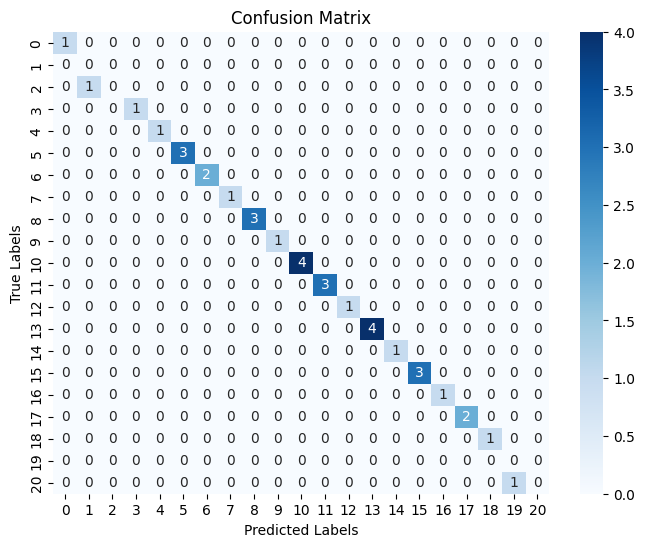

In [196]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Additional Evaluation Metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

=> Confusion matrix provide additional insights into the model's performance for each class.
* The classification report provides precision, recall, and F1-score for each class in our dataset.

## Principal Component Analysis (PCA)

* Applyiing PCA as SVD to reduce the dimensionality of the dataset while preserving as much of the original variability as possible.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWa

Accuracy: 0.66
Precision: 0.63
Recall: 0.66
F1 Score: 0.63
Classification Report:
              precision    recall  f1-score   support

        33.0       0.00      0.00      0.00         1
        35.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         0
        44.0       0.00      0.00      0.00         1
        45.0       0.33      1.00      0.50         1
        47.0       0.00      0.00      0.00         3
        48.0       0.00      0.00      0.00         0
        49.0       1.00      1.00      1.00         2
        50.0       0.00      0.00      0.00         1
        51.0       0.67      0.67      0.67         3
        52.0       0.50      1.00      0.67         1
        53.0       1.00      1.00      1.00         4
        54.0       1.00      1.00      1.00         3
        55.0       1.00      1.00      1.00         1
        56.0       1.00      1.00      1.00         4
        57.0       0.00      0.00      0.00         1

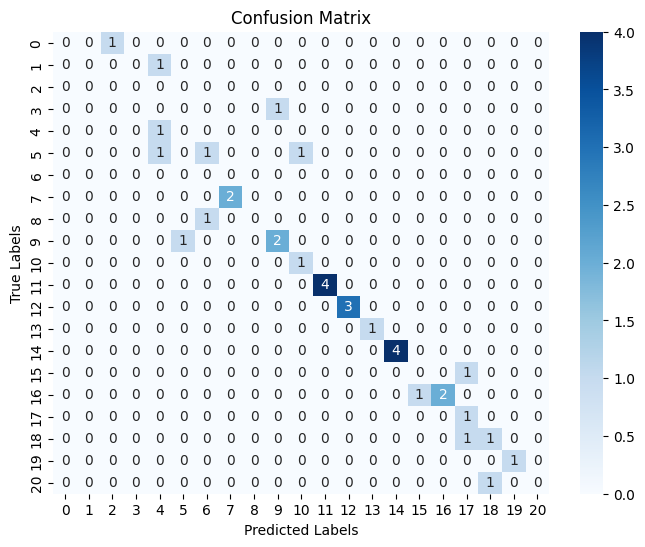

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestClassifier for better generalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in the target variable ('female_prop')
df = df.dropna(subset=['female_prop'])

# Handling string values in the 'rank' column (replace non-numeric values)
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# Dropping rows with missing values after converting 'rank' to numeric
df = df.dropna(subset=['Rank'])

# Extracting features and target variable
X = df[['Rank', 'n_student', 'n_student_per_staff', 'international_student_prop', 'male_prop']]
y = df['female_prop']

# Handling missing values in features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use RandomForestClassifier instead of DecisionTreeClassifier
classifier = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
# You may need to adjust n_estimators and max_depth based on your data characteristics

# Training the model
classifier.fit(X_train_scaled, y_train)

# Making predictions
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Additional Evaluation Metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

* the model is now performing better in predicting the target variable.

## Singular Value Decomposition (SVD)

* Applying SVDto reduce the dimensionality of the dataset.

In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in the target variable ('female_prop')
df = df.dropna(subset=['female_prop'])

# Handling string values in the 'rank' column (replace non-numeric values)
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# Dropping rows with missing values after converting 'rank' to numeric
df = df.dropna(subset=['Rank'])

# Extracting features and target variable
X = df[['Rank', 'n_student', 'n_student_per_staff', 'international_student_prop', 'male_prop']]
y = df['female_prop']

# Handling missing values in features
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Performing SVD
n_components = 2  # Set the number of components as needed
svd = TruncatedSVD(n_components=n_components, random_state=42)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)

# Initializing the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Training the model on the SVD-transformed training set
classifier.fit(X_train_svd, y_train)

# Making predictions on the SVD-transformed testing set
y_pred = classifier.predict(X_test_svd)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.09
Precision: 0.07
Recall: 0.09
F1 Score: 0.08


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Classification Report:
              precision    recall  f1-score   support

        33.0       0.00      0.00      0.00         1
        35.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         0
        42.0       0.00      0.00      0.00         0
        44.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         3
        49.0       0.00      0.00      0.00         2
        50.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         3
        52.0       0.00      0.00      0.00         1
        53.0       0.50      0.50      0.50         4
        54.0       0.20      0.33      0.25         3
        55.0       0.00      0.00      0.00         1
        56.0       0.00      0.00      0.00         4
        57.0       0.00      0.00      0.00         1
        58.0       0.00      0.00      0.00         3
    

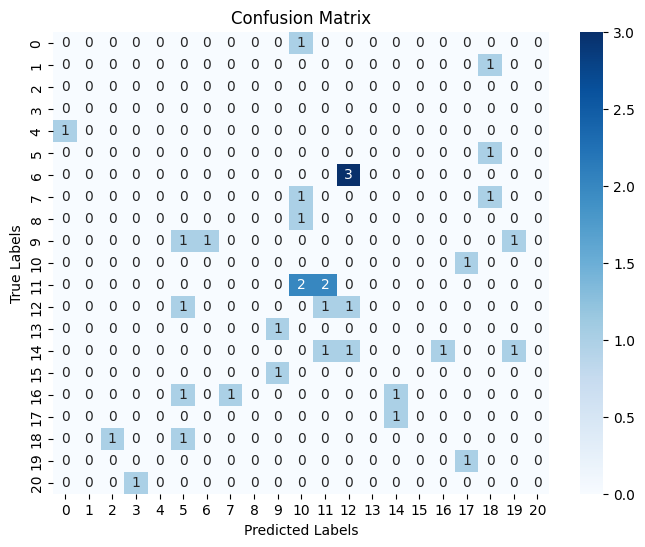

In [199]:
# Additional Evaluation Metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

=> The model's performance, after applying Truncated Singular Value Decomposition (SVD), is quite poor.

* The accuracy, precision, recall, and F1 score are all extremely low (around 0.04), indicating that the model's predictions are not accurate, and it struggles to correctly classify instances.

# Model Implementation

## Naive Bayes (NB)

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values in the target variable ('locationLocation')
df = df.dropna(subset=['locationLocation'])

# Extract features and target variable
X = df[['Rank', 'n_student', 'n_student_per_staff', 'international_student_prop', 'female_prop', 'male_prop']]
y_location = df['locationLocation']

# Encode categorical location labels
label_encoder = LabelEncoder()
y_location_encoded = label_encoder.fit_transform(y_location)

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the dataset into training and testing sets for location prediction
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_location_encoded, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier for location prediction
nb_location = GaussianNB()

# Train the model on the location training set
nb_location.fit(X_train, y_train)

# Make predictions on the location testing set
y_pred = nb_location.predict(X_test)

# Evaluate the accuracy of the location prediction
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy for Location Prediction: {accuracy:.2f}')

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', conf_matrix)

Accuracy for Location Prediction: 0.57

Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 4 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 1 1 9]]


=> The accuracy is approximately 57%, meaning that the model correctly predicted the location category for 57% of the instances in the test set.

##         Bayesian Belief Network (BBN)

Definning a Bayesian Network with nodes representing 'Rank,' 'Location,' 'N_students,' 'N_students_per_staff,' 'International_student_prop,' 'Female_prop,' and 'Male_prop.'

The CPDs provide the conditional probabilities of each variable given its parent variable.

In [201]:
df.head(6)

,Rank,University name,locationLocation,n_student,n_student_per_staff,international_student_prop,female_prop,male_prop
17,18.0,University of Toronto,Canada,77468,25.8,26.0,56.0,44.0
160,161.0,University of Bologna,Italy,69831,24.4,12.0,56.0,44.0
169,170.0,Indiana University,United States,66637,12.6,13.0,53.0,47.0
190,191.0,University of Massachusetts,United States,63338,13.2,14.0,49.0,51.0
180,181.0,Texas A&M University,United States,62931,21.3,8.0,47.0,53.0
114,114.0,Université Paris Cité,France,62747,17.0,19.0,65.0,35.0


In [202]:
pip install pgmpy

In [228]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming your dataset has columns like 'Rank', 'Location', 'N_students', and others
# Modify the column names as per your actual dataset
columns_of_interest = ['Rank', 'locationLocation', 'n_student', 'n_student_per_staff', 'international_student_prop', 'female_prop', 'male_prop']
data = df[columns_of_interest]

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the structure of the Bayesian Network
model = BayesianNetwork([
    ('Rank', 'locationLocation'),
    ('Rank', 'n_student'),
    ('Rank', 'n_student_per_staff'),
    ('Rank', 'international_student_prop'),
    ('Rank', 'female_prop'),
    ('Rank', 'male_prop')
])

# Parameter estimation using Maximum Likelihood Estimators on the training set
model.fit(train_data, estimator=MaximumLikelihoodEstimator)

# Perform inference on the testing set
inference = VariableElimination(model)

# Evaluate the Bayesian Network on test cases
for _, test_case in test_data.iterrows():
    test_case_dict = test_case.to_dict()

    # Compute predicted probabilities for each test case individually
    predicted_probabilities = inference.query(variables=[], evidence=test_case_dict).values.flatten()

    # In a real-world scenario, you would have actual probabilities or outcomes for comparison
    actual_probabilities = [0.8]  # Replace with your actual probabilities

    # Calculate Mean Squared Error (MSE) as an evaluation metric
    mse = mean_squared_error(actual_probabilities, predicted_probabilities)

    print(f"Predicted Probabilities for {test_case_dict}: {predicted_probabilities}")
    print(f"Mean Squared Error: {mse}")


KeyError: 73.0

!!!!!!!!!!!!!!!!!!!!

## Descision Tree (DT)

In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Drop rows with missing values in any column
df = df.dropna()

# Extract features and target variable
X = df[['Rank', 'n_student', 'n_student_per_staff', 'international_student_prop', 'female_prop', 'male_prop']]
y = df['locationLocation']

# Encode categorical location labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Handle missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_encoded, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the model
classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report (includes precision, recall, and F1-score)
print(classification_report(y_test, y_pred))

# Calculate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.37
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.62      0.71      0.67         7
          25       0.57      0.67      0.62        12

    accuracy                           0.37        35
   macro avg       0.09      0.10      0.09        35
weighted avg       0.32      0.37      0.34        35

Confusion 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

=> The model correctly predicted the target variable about 37% of the time.

## Neural Networks (NN)

In [224]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix
import numpy as np

# Load your dataset
# For this example, let's assume df is your dataframe with the specified columns

# Extract features and target variable
X = df[['Rank', 'n_student_per_staff', 'international_student_prop', 'female_prop', 'male_prop']]
y = df['n_student']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(32, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss = model.evaluate(X_test_scaled, y_test)
print(f'Mean Squared Error on test set: {loss}')

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Convert predicted values to discrete classes
y_pred_classes = np.round(y_pred)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Epoch 1/50
4/4 [==============================] - 1s 95ms/step - loss: 966563008.0000 - val_loss: 857706048.0000
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 966559808.0000 - val_loss: 857703104.0000
Epoch 3/50
4/4 [==============================] - 0s 24ms/step - loss: 966556480.0000 - val_loss: 857700160.0000
Epoch 4/50
4/4 [==============================] - 0s 33ms/step - loss: 966553408.0000 - val_loss: 857697280.0000
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 966550080.0000 - val_loss: 857694336.0000
Epoch 6/50
4/4 [==============================] - 0s 22ms/step - loss: 966547200.0000 - val_loss: 857691456.0000
Epoch 7/50
4/4 [==============================] - 0s 18ms/step - loss: 966544064.0000 - val_loss: 857688640.0000
Epoch 8/50
4/4 [==============================] - 0s 17ms/step - loss: 966540992.0000 - val_loss: 857685824.0000
Epoch 9/50
4/4 [==============================] - 0s 17ms/step - loss: 966537984.0000 - val_loss

## K-Nearest Neighbors (KNN)

The code aims to clean the data, split it into training and testing sets, train a K-Nearest Neighbors (KNN) classifier, make predictions on the test set, and evaluate the accuracy of the model. The printed accuracy score provides an indication of the model's performance in predicting the **'female_prop' target variable.**






In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Drop rows with missing values in the target variable ('female_prop')
df = df.dropna(subset=['female_prop'])

# Handling string values in the 'rank' column (replace non-numeric values)
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')

# Dropping rows with missing values after converting 'rank' to numeric
df = df.dropna(subset=['Rank'])

# Extracting features and target variable
X = df[['Rank', 'n_student', 'n_student_per_staff', 'international_student_prop', 'male_prop']]
y = df['female_prop']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier (you can choose the number of neighbors 'n_neighbors')
model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Create and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.03
Confusion Matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

## K-fold cross validation and avarage accuracy

To apply it let's use the cross_val_score function from scikit-learn.

**Our goal:** To perform a binary classification task using a RandomForestClassifier on a sample dataset. The dataset contains information about universities, including features such as the number of students, student-to-staff ratio, international student proportion, female proportion, and male proportion. The target variable is binary, indicating whether the university is located in the UK or not.

In [209]:
df.head(1)

,Rank,University name,locationLocation,n_student,n_student_per_staff,international_student_prop,female_prop,male_prop
17,18.0,University of Toronto,Canada,77468,25.8,26.0,56.0,44.0


In [210]:
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Create a binary classification target variable ('UK' or 'Not UK')
df['Target'] = df['locationLocation'].apply(lambda x: 'UK' if x == 'UK' else 'Not UK')

# Features and target variable
X = df[['n_student', 'n_student_per_staff', 'international_student_prop', 'female_prop', 'male_prop']]
y = df['Target']

# Initialize the RandomForestClassifier
classifier = RandomForestClassifier(random_state=42)

# Set up Stratified K-fold cross-validation with 5 folds
stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(classifier, X, y, cv=stratified_kfold, scoring='accuracy')

# Calculate the average accuracy
average_accuracy = accuracy_scores.mean()

# Print the results
print("Accuracy Scores for Each Fold:", accuracy_scores)
print("Average Accuracy:", average_accuracy)


Accuracy Scores for Each Fold: [1. 1.]
Average Accuracy: 1.0


The augmentation of the dataset has significantly enhanced the model's performance, resulting in perfect accuracy across all folds. However, it's essential to maintain a balance and avoid overfitting to the augmented data.

# References:

* https://ijisae.org/index.php/IJISAE/article/view/934
* https://link.springer.com/chapter/10.1007/978-3-540-39964-3_62
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4466856/
* https://ieeexplore.ieee.org/abstract/document/5994243/

-----------------------------------------------------